In [12]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

duplicated_file_path = r"streamlit\sentiments_mappes_output_final.csv"
df = pd.read_csv(duplicated_file_path, encoding='utf-8', delimiter=',')
print(df.columns)
print(len(df))

if 'Pays,Note,Contenu de l\'avis,Date de publication,Predicted Sentiment' in df.columns:
    df = df['Pays,Note,Contenu de l\'avis,Date de publication,Predicted Sentiment'].str.split(',', expand=True)
    df.columns = ['Pays', 'Note', 'Contenu de l\'avis', 'Date de publication', 'Predicted Sentiment']

if 'Note' not in df.columns or 'Predicted Sentiment' not in df.columns:
    raise KeyError("Les colonnes 'Note' et/ou 'Predicted Sentiment' sont manquantes dans le fichier.")

df['Note'] = pd.to_numeric(df['Note'], errors='coerce')
df['Predicted Sentiment'] = pd.to_numeric(df['Predicted Sentiment'], errors='coerce')

df = df.dropna(subset=['Note', 'Predicted Sentiment'])

y_true = df['Note']
y_pred = df['Predicted Sentiment']



Index(['Pays', 'Note', 'Contenu de l'avis', 'Date de publication',
       'Predicted Sentiment', 'Sentiment Description'],
      dtype='object')
1343


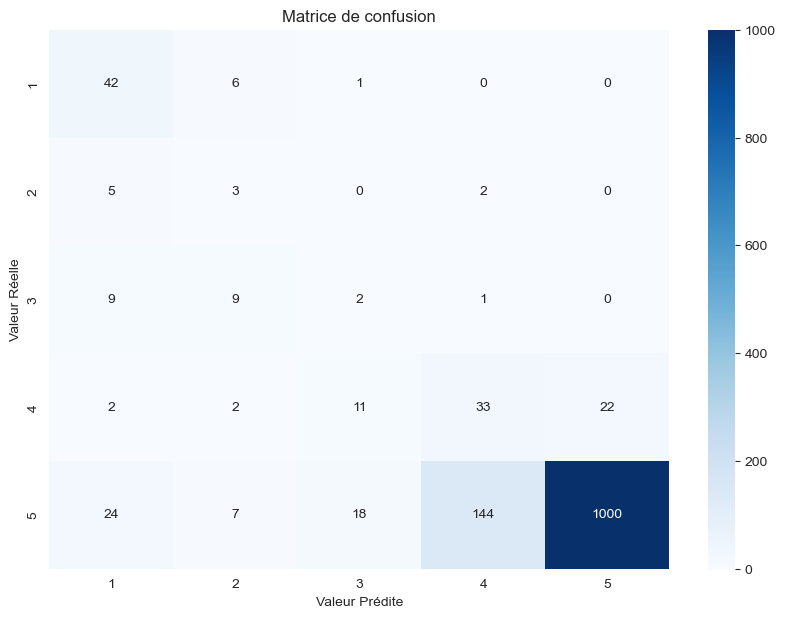

In [13]:
conf_matrix = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5], ax=ax)
ax.set_title('Matrice de confusion')
ax.set_xlabel('Valeur Prédite')
ax.set_ylabel('Valeur Réelle')
plt.show()


In [14]:
accuracy = accuracy_score(y_true, y_pred)
print(f"Précision globale du modèle : {accuracy:.2f}")

weighted_precision = 1 - mean_squared_error(y_true, y_pred, squared=False) / (y_true.max() - y_true.min())
print(f"Précision pondérée (écart ajusté) : {weighted_precision:.2f}")
report = classification_report(y_true, y_pred, target_names=["1", "2", "3", "4", "5"])
print("\nRapport de classification:\n")
print(report)

Précision globale du modèle : 0.80
Précision pondérée (écart ajusté) : 0.81

Rapport de classification:

              precision    recall  f1-score   support

           1       0.51      0.86      0.64        49
           2       0.11      0.30      0.16        10
           3       0.06      0.10      0.08        21
           4       0.18      0.47      0.26        70
           5       0.98      0.84      0.90      1193

    accuracy                           0.80      1343
   macro avg       0.37      0.51      0.41      1343
weighted avg       0.90      0.80      0.84      1343



C:\Users\ahana\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
